In [11]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import random
from sklearn.decomposition import PCA
import seaborn as sn
from scipy import stats
import skfuzzy
from skfuzzy import control as ctrl
from sklearn.metrics import accuracy_score
from mat4py import loadmat
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from pyit2fls import Mamdani, IT2FS_Gaussian_UncertStd, IT2FS_plot, \
                     min_t_norm, max_s_norm, crisp
from numpy import linspace, meshgrid, zeros
from pyit2fls import IT2FS_Gaussian_UncertMean, IT2FS_plot, meet, \
                     join, min_t_norm, max_s_norm

In [12]:
data = loadmat('emnist-digits-150.mat')
a = data['dataset']
b = a['DigitImage']
images = b['images']
labels = b['labels']
digits = np.array(images)
bwdigits = digits

In [13]:
class PreprocessData:
    def NomalizeData(Data):
        Data=np.array(Data)
        lenght = len(Data)
        normalizedData = []
        
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame

In [14]:
label = []
for i in range (len(labels)):
    label.append(labels[i][0])
    

In [15]:
target = np.array(label)

#extract feature with flda 
lda = LDA(n_components=9)
NewDigits = lda.fit_transform(digits, target)
# TestData = lda.transform(TestData)
NewDigits.shape

(150, 9)

In [16]:
Data = pd.DataFrame(NewDigits, columns = ['f1','f2','f3','f4','f5','f6','f7','f8','f9'])
# Data = pd.DataFrame(newww, columns = ['f1','f2'])
Data['TARGET'] = label
Data['f1'] = Data['f1']+(abs(Data['f1'].min()))
Data['f2'] = Data['f2']+(abs(Data['f2'].min()))
Data['f3'] = Data['f3']+(abs(Data['f3'].min()))
Data['f4'] = Data['f4']+(abs(Data['f4'].min()))
Data['f5'] = Data['f5']+(abs(Data['f5'].min()))
Data['f6'] = Data['f6']+(abs(Data['f6'].min()))
Data['f7'] = Data['f7']+(abs(Data['f7'].min()))
Data['f8'] = Data['f8']+(abs(Data['f8'].min()))
Data['f9'] = Data['f9']+(abs(Data['f9'].min()))

Data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,TARGET
0,11.418653,3.751230,11.981976,4.738933,7.227988,5.790101,3.540473,5.297204,3.083235,0
1,2.983005,9.873780,7.820374,4.899786,6.678031,7.153805,6.736518,2.210640,5.091382,9
2,1.915534,7.037214,10.214927,5.326232,1.394789,4.904078,1.703361,3.640719,2.178594,7
3,4.702640,10.766252,6.857375,4.883366,6.744726,9.980633,6.107834,2.153912,7.599105,9
4,9.503366,7.044473,8.777936,9.279561,2.091095,0.413912,6.762935,8.149234,8.501042,2
...,...,...,...,...,...,...,...,...,...,...
145,0.902193,7.420871,9.918783,5.414055,2.086517,2.784350,1.375413,3.602570,1.697238,7
146,10.422931,11.372033,8.324603,6.109905,2.829766,10.555594,2.129882,7.025751,5.271638,8
147,12.395030,7.653852,5.336362,0.197707,3.036044,4.499732,5.889301,5.793696,3.356799,5
148,9.632242,6.647781,9.052528,8.965568,1.892256,0.867180,6.906464,8.442490,8.417439,2


In [17]:
Dataset = PreprocessData.TestAndTrain(Data , 80)

Datas = Dataset[0]
TestData = Dataset[1]
targetTest = TestData['TARGET']
TestData = TestData.drop('TARGET',axis=1)

In [18]:
memberships = []
fuzzyfiedsets = []
fuzzyfiedtarget = []

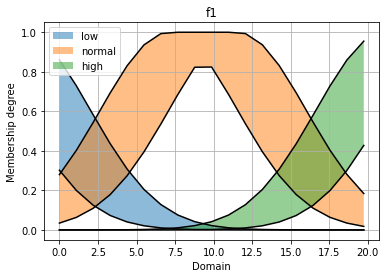

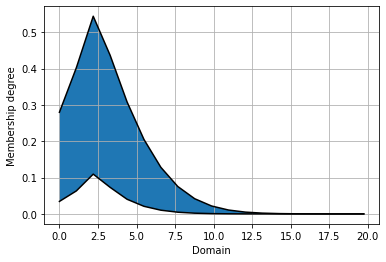

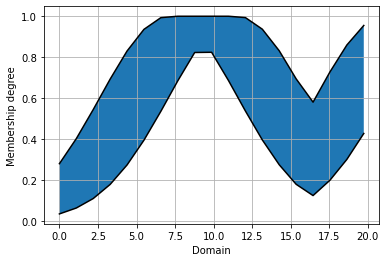

In [31]:
#feature one

fone= list(Datas['f1'])


domain = linspace(0, max(fone),int(max(fone)))
mean = np.mean(fone)
std = np.std(fone)

A = IT2FS_Gaussian_UncertMean(domain, [-0.5*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [1*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [2.5*mean, std, std, 1.])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="f1", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")




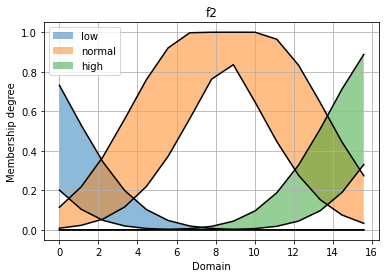

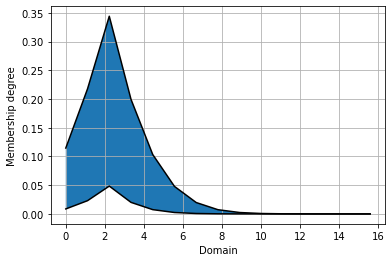

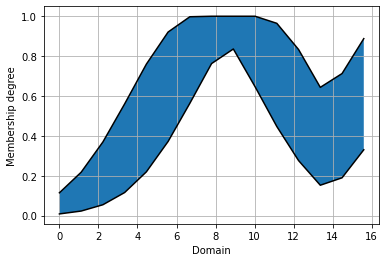

In [37]:
#feature two

ftwo= list(Datas['f2'])


domain = linspace(0, max(ftwo),int(max(ftwo)))
mean = np.mean(ftwo)
std = np.std(ftwo)

A = IT2FS_Gaussian_UncertMean(domain, [-0.5*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [1*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [2.2*mean, std, std, 1.])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="f2", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")



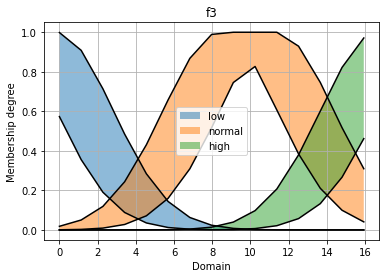

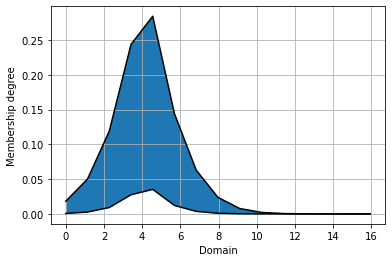

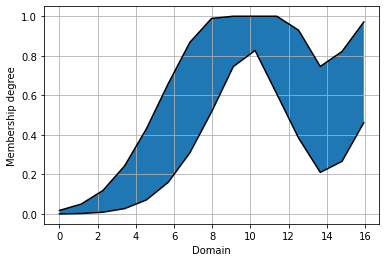

In [39]:
#feature three

fthree= list(Datas['f3'])

domain = linspace(0, max(fthree),int(max(fthree)))
mean = np.mean(fthree)
std = np.std(fthree)

A = IT2FS_Gaussian_UncertMean(domain, [-0.2*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [1.2*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [2.2*mean, std, std, 1.])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="f3", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")



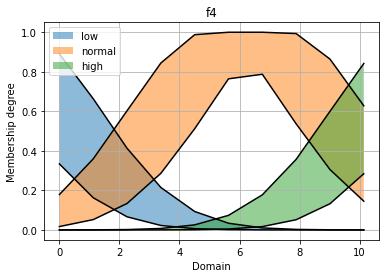

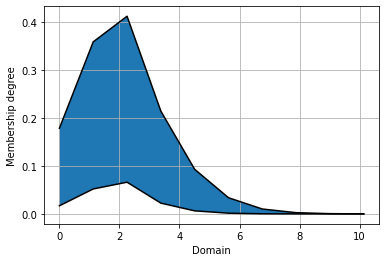

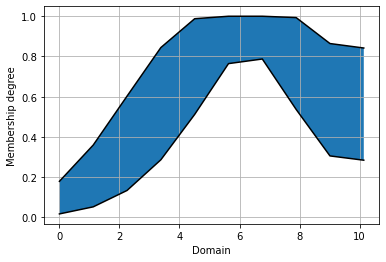

In [47]:
#feature four

ffour= list(Datas['f4'])
domain = linspace(0, max(ffour),int(max(ffour)))
mean = np.mean(ffour)
std = np.std(ffour)

A = IT2FS_Gaussian_UncertMean(domain, [-0.5*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [1.2*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [2.5*mean, std, std, 1.])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="f4", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")



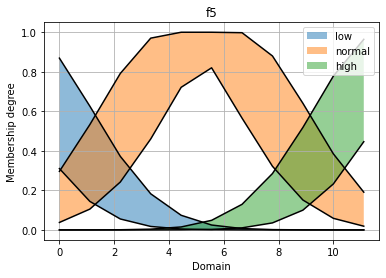

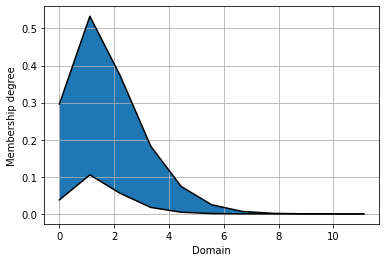

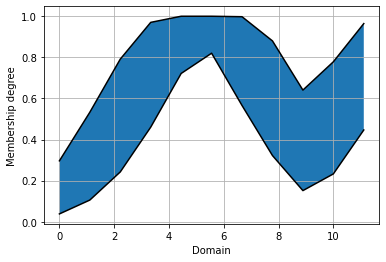

In [48]:
#feature five

ffive= list(Datas['f5'])

domain = linspace(0, max(ffive),int(max(ffive)))
mean = np.mean(ffive)
std = np.std(ffive)

A = IT2FS_Gaussian_UncertMean(domain, [-0.5*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [1*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [2.5*mean, std, std, 1.])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="f5", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")



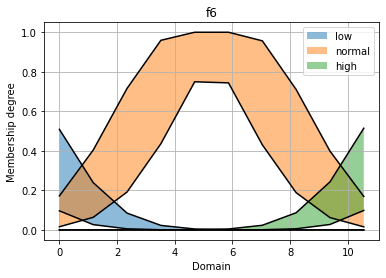

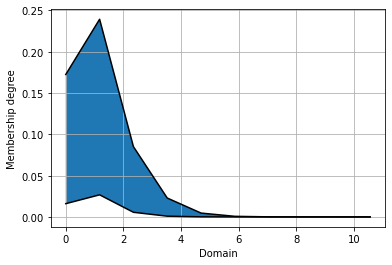

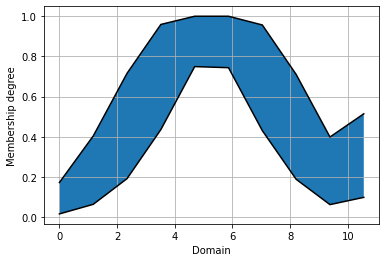

In [53]:
#feature six

fsix= list(Datas['f6'])

domain = linspace(0, max(fsix),int(max(fsix)))
mean = np.mean(fsix)
std = np.std(fsix)

A = IT2FS_Gaussian_UncertMean(domain, [-0.7*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [1*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [2.7*mean, std, std, 1.])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="f6", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")



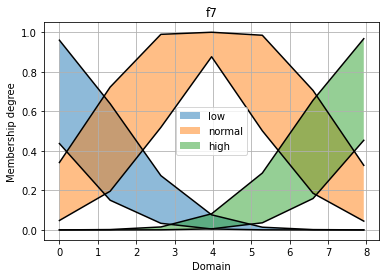

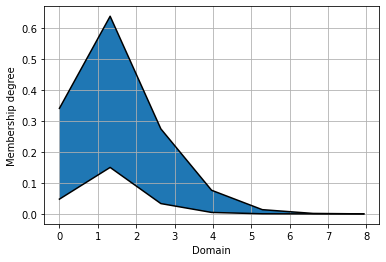

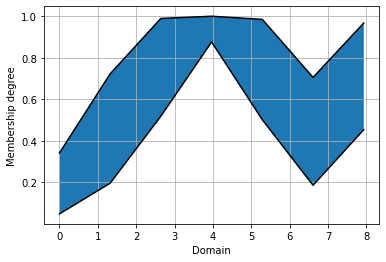

In [59]:
#feature seven

fseven= list(Datas['f7'])

domain = linspace(0, max(fseven),int(max(fseven)))
mean = np.mean(fseven)
std = np.std(fseven)

A = IT2FS_Gaussian_UncertMean(domain, [-0.4*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [1*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [2.4*mean, std, std, 1.])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="f7", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")



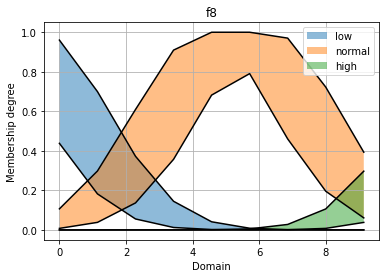

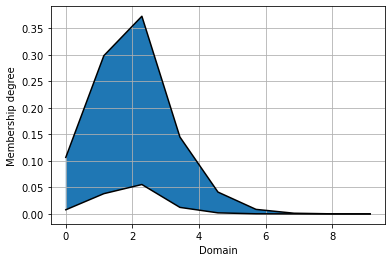

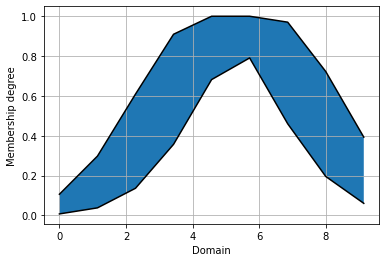

In [65]:
#feature eight

feight= list(Datas['f8'])

domain = linspace(0, max(feight),int(max(feight)))
mean = np.mean(feight)
std = np.std(feight)

A = IT2FS_Gaussian_UncertMean(domain, [-0.3*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [1*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [2.5*mean, std, std, 1.])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="f8", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")


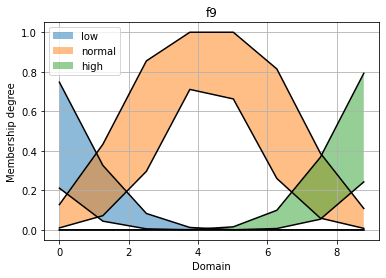

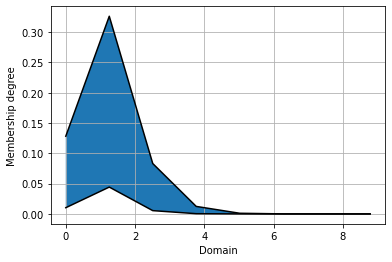

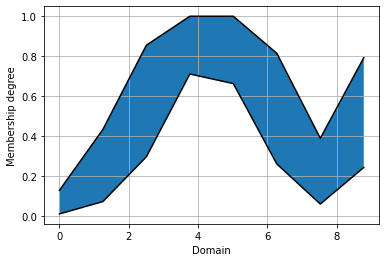

In [67]:
#feature nine

fnine= list(Datas['f9'])


domain = linspace(0, max(fnine),int(max(fnine)))
mean = np.mean(fnine)
std = np.std(fnine)

A = IT2FS_Gaussian_UncertMean(domain, [-0.5*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [1*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [2.5*mean, std, std, 1.])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="f9", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")

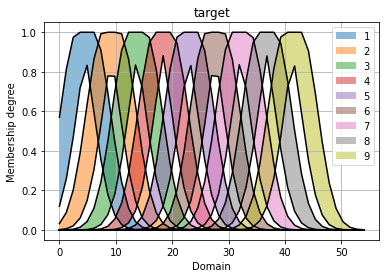

In [97]:
#TARGET 

target= list(Datas['TARGET'])


domain = linspace(0, 6*max(target),5*int(max(target)))
mean = np.mean(target)
std = np.std(target)

one= IT2FS_Gaussian_UncertMean(domain, [1*mean, std, std, 1.])
two= IT2FS_Gaussian_UncertMean(domain, [2*mean, std, std, 1.])
three= IT2FS_Gaussian_UncertMean(domain, [3*mean, std, std, 1.])

four= IT2FS_Gaussian_UncertMean(domain, [4*mean, std, std, 1.])
five= IT2FS_Gaussian_UncertMean(domain, [5*mean, std, std, 1.])
six= IT2FS_Gaussian_UncertMean(domain, [6*mean, std, std, 1.])

seven= IT2FS_Gaussian_UncertMean(domain, [7*mean, std, std, 1.])
eight= IT2FS_Gaussian_UncertMean(domain, [8*mean, std, std, 1.])
nine= IT2FS_Gaussian_UncertMean(domain, [9*mean, std, std, 1.])


IT2FS_plot(one, two, three,four,five,six,seven,eight,nine, title="target", legends=['1','2','3','4','5','6','7','8','9'], filename="multiSet")



In [20]:
a = np.array(fuzzyfiedsets,dtype=object)
print(a.shape)
memberships
b = np.array(memberships,dtype=object)
print(b.shape)
b

(9, 3)
(10,)


array([list([f1[low], f1[normal], f1[high]]),
       list([f2[low], f2[normal], f2[high]]),
       list([f3[low], f3[normal], f3[high]]),
       list([f4[low], f4[normal], f4[high]]),
       list([f5[low], f5[normal], f5[high]]),
       list([f6[low], f6[normal], f6[high]]),
       list([f7[low], f7[normal], f7[high]]),
       list([f8[low], f8[normal], f8[high]]),
       list([f9[low], f9[normal], f9[high]]),
       list([TARGET[zero], TARGET[one], TARGET[two], TARGET[three], TARGET[four], TARGET[five], TARGET[six], TARGET[seven], TARGET[eight], TARGET[nine]])],
      dtype=object)

In [99]:
myIT2FLS = Mamdani(min_t_norm, max_s_norm)
myIT2FLS.add_input_variable("f1")
myIT2FLS.add_input_variable("f2")
myIT2FLS.add_input_variable("f3")
myIT2FLS.add_input_variable("f4")
myIT2FLS.add_input_variable("f5")
myIT2FLS.add_input_variable("f6")
myIT2FLS.add_input_variable("f7")
myIT2FLS.add_input_variable("f8")
myIT2FLS.add_input_variable("f9")
myIT2FLS.add_output_variable("1")
myIT2FLS.add_output_variable("2")
myIT2FLS.add_output_variable("3")
myIT2FLS.add_output_variable("4")
myIT2FLS.add_output_variable("5")
myIT2FLS.add_output_variable("6")
myIT2FLS.add_output_variable("7")
myIT2FLS.add_output_variable("8")
myIT2FLS.add_output_variable("9")



myIT2FLS.add_rule([("f1", A), ("f2", B)], [("1", C), ("2", C)])
myIT2FLS.add_rule([("f1", A), ("f2", B)], [("1", B), ("2", A)])
myIT2FLS.add_rule([("x1", C), ("x2", C)], [("y", C), ("2", A)])

myIT2FLS.add_rule([("f1", A), ("f2", B),("f4", A), ("f5", B)], [("1", C), ("2", C)])
myIT2FLS.add_rule([("f1", A), ("f2", B),("f3", A), ("f4", B),("f6", A), ("f7", C)], [("1", B), ("2", A)])
myIT2FLS.add_rule([("f1", C), ("f8", C)], [("3", C), ("5", A)])


In [100]:
myIT2FLS.rules

[([('f1',
    Interval type 2 fuzzy set with gauss_uncert_mean_umf UMF function with [-3.7739402972983673, -0.8260597027016323, 2.947880594596735, 1.0] parameters, and gauss_uncert_mean_lmf LMF function with [-3.7739402972983673, -0.8260597027016323, 2.947880594596735, 1.0] parameters.),
   ('f2',
    Interval type 2 fuzzy set with gauss_uncert_mean_umf UMF function with [3.126059702701632, 6.073940297298368, 2.947880594596735, 1.0] parameters, and gauss_uncert_mean_lmf LMF function with [3.126059702701632, 6.073940297298368, 2.947880594596735, 1.0] parameters.)],
  [('1',
    Interval type 2 fuzzy set with gauss_uncert_mean_umf UMF function with [10.026059702701632, 12.973940297298368, 2.947880594596735, 1.0] parameters, and gauss_uncert_mean_lmf LMF function with [10.026059702701632, 12.973940297298368, 2.947880594596735, 1.0] parameters.),
   ('2',
    Interval type 2 fuzzy set with gauss_uncert_mean_umf UMF function with [10.026059702701632, 12.973940297298368, 2.947880594596735, 1